<h1 style="color:red;"><b>TF-IDF</b></h1>
<p>Term Frequency Inverse Document Frequency(TF-IDF)-very popular algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction. It's calculate by formula that showen below:</p>
$$
TF-IDF=Term Frequency (TF) * Inverse Document Frequency (IDF)
$$
<ol>
    <li>Term Frequency-measures the frequency of a word in a document. Depends on the length of the document and the generality of the word. Individual to each document and word. Formula of TF is showen below:
    $$
    TF(t-term,d-document)=\frac{Q}{ND}
    $$
        <p>Q-Count of t in d.</p>
        <p>ND-number of words in d./</p>
    </li>
    <li>Inverse Document Frequency-measures the informativeness of term. Formula of IDF is showen below:
    $$
    IDF(term)=\log{}{\frac{CountC}{DF}}
    $$
    </li>
        <p>CountC-Count of corps.</p>
        <p>DF-Occurrence of t in N documents.</p>
</ol>

<h2 style="color:red;"><b>Vector-Space Model</b></h2>
<ol>
    <li>Vector-Space Model- is collection of objects called vectors which are numerical representations of words, sentence, and even documents.</li>
    <li>Can have thousands dimenssions.</li>
    <li>Helps to determine the similarity between words or the relevance between a search query and document.</li>
    <li>Advantages: simple query language, reduces to a dot product.</li>
    <li>Disadvantages: can't deal with lexical ambiguity and variability, vectors are orthogonal even though the concepts are related.</li>
</ol>

<h2 style="color:red;"><b>Part 1</b></h2>

<h2 style="color:red;"><b>Building BOW Representation & TF-IDF</b></h2>
<p>==========IMPORT AND PREPROCESSING DATA==========</p>
<p>In previous lab we already clean trainTwitter.csv  and the result we saved in clean-tweets.csv, so now just import already clean data.<ol>We did cleaning with:
    <li>Lemmatization.</li>
    <li>Stemming.</li>
    <li>Remove @ that is not part of the tweet itself but those of a username who posted it.</li>
    <li>Tokenize</li>
</ol></p>

In [18]:
import pandas as pd
import re
from nltk.stem.porter import PorterStemmer
#Step 1: Tokenize a sentence-done in preprocessing
#Step 2: Apply tokenization to all sentences
#Step 3:Build vocabulary and generate vectors
# Import clean tweets
temp = pd.read_csv('clean-tweets.csv')
nan_value = float("NaN")
stem = PorterStemmer()
temp.replace("", nan_value, inplace=True)
temp.dropna(subset = ['After'], inplace=True)
clean_tweets = temp['After']
original_tweets = []  
tweetsPart2 = list() 
pattern = r'[ðâï¾¼½µãªºð]'

# Dictionary
wordFreqDict = {}
for tweet in clean_tweets:
    clean_tweet = re.sub(pattern, '', tweet)
    original_tweets.append(clean_tweet)
    token = clean_tweet.split()
    tweetsPart2.append([stem.stem(t) for t in token])
    for word in token:
        if word in wordFreqDict:
            wordFreqDict[word] += 1;
        else:
            wordFreqDict[word] = 1;
            
dict_table = pd.DataFrame(wordFreqDict.items(),columns=['Word','Frequency'])
dict_table.head(10)

,Word,Frequency
0,father,131
1,dysfunctional,1
2,selfish,7
3,drags,4
4,kids,143
5,dysfunction,2
6,thanks,269
7,credit,15
8,cant,811
9,use,115


<H2>BOW IMPLEMENTATION</H2>

In [46]:
import time
# Prepare dictinary and tweets
smallBag = tweetsPart2[0:100]
biggerBag = tweetsPart2[0:1000]
# Build small and larger dict (choose most frequent word)
dict_table = dict_table.sort_values(by='Frequency', ascending=False)
smallDict= [stem.stem(t) for t in dict_table['Word'][0:100]]
bigDict = list(wordFreqDict.keys()) 
print('Example of tweet', smallBag[0])
print('Example of dictinary', bigDict[0:10])

Example of tweet ['father', 'dysfunct', 'selfish', 'drag', 'kid', 'dysfunct']
Example of dictinary ['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'thanks', 'credit', 'cant', 'use']


In [47]:
start = time.time()
# Build all words BOW for 1000 tweets
BOW = {}
# go over each word in dictinary to build row 
for word in bigDict:
    matrix_row = list()
    # go over all tweet in tweets bag and check if contain word from dictinary 
    for tweet in biggerBag:
        matrix_row.append(tweet.count(word))
    BOW[word]=matrix_row
    
# Bulding dictinary for 1000 tweets 
tweetDict = {}
for i in range(len(biggerBag)):
    strIndex = 't'+str(i)
    tweetDict[strIndex]=original_tweets[i]
    
end = time.time()
print('Time to build such BOW and dictinary ' + str(end - start))    
#Show all in one table   
matrixColumns = []
matrixColumns = list(tweetDict.keys())
matrix_table = pd.DataFrame.from_dict(BOW, orient='index',columns=matrixColumns)
matrix_table.head(10)

Time to build such BOW and dictinary 5.731931924819946


,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t990,t991,t992,t993,t994,t995,t996,t997,t998,t999
father,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dysfunctional,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
selfish,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
drags,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kids,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dysfunction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
thanks,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
credit,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cant,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
use,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<p>====================Calculating TF-IDF====================</p>

In [28]:
import sklearn as sk
import math
#TF
worFreqDict=dict()
tf=list()
t=temp['After'][152].split()

def freq(token):
    for word in token:
        if word in worFreqDict:
            worFreqDict[word] += 1;
        else:
            worFreqDict[word] = 1;
            
def tfi_Func():
    freq(t)
    for w in t:
        tf.append(worFreqDict[w]/float(len(t)))
tfi_Func()   
result={'Word':t,'TF':tf}

tf_idf_table = pd.DataFrame(result)
tf_idf_table.head(10)

,Word,TF
0,us,0.125
1,year,0.250
2,waiting,0.125
3,show,0.125
4,sta,0.125
5,3rd,0.125
6,year,0.250
7,running,0.125


In [29]:
#IDF
idf = list()

def idf_Func():
    words=tf_idf_table['Word']
    N = len(words)
    freq=worFreqDict.values()
    for w in t:
        idf.append(math.log10(N / float(worFreqDict[w])))
        
idf_Func()
tf_idf_table['IDF'] = idf
tf_idf_table.head(10)

,Word,TF,IDF
0,us,0.125,0.90309
1,year,0.250,0.60206
2,waiting,0.125,0.90309
3,show,0.125,0.90309
4,sta,0.125,0.90309
5,3rd,0.125,0.90309
6,year,0.250,0.60206
7,running,0.125,0.90309


In [30]:
#TF-IDF
tfidf=list()
N=len(tf_idf_table['Word'])
i=0
tf=tf_idf_table['TF']
idf=tf_idf_table['IDF']
while (i<N):
    tfidf.append(tf[i]*idf[i])
    i=i+1
tf_idf_table['TF-IDF'] = tfidf
tf_idf_table.head(10)

,Word,TF,IDF,TF-IDF
0,us,0.125,0.90309,0.112886
1,year,0.250,0.60206,0.150515
2,waiting,0.125,0.90309,0.112886
3,show,0.125,0.90309,0.112886
4,sta,0.125,0.90309,0.112886
5,3rd,0.125,0.90309,0.112886
6,year,0.250,0.60206,0.150515
7,running,0.125,0.90309,0.112886


<H2>#After Small research we will build function to calculate TF-IDF PER ONE TWEET</H2>

In [48]:
#After Small research we will build function to calculate TF-IDF PER ONE TWEET
#we are using tweet_dict that holds frequency of each word 
def calcTF_IDF(word, tweet):
    tf = tweet.count(word)
    n = len(wordFreqDict)
    df = float(wordFreqDict[word])
    if(df > 0 and tf > 0):
        tf_idf = (1 + math.log2(tf)) * math.log10(n / df)
    else:
        tf_idf = 0
    return tf_idf

<H2>TF-IDF FOR ALL TWEETS</H2>

In [50]:
start = time.time()
# Build all words BOW for 1000 tweets
TF_IDF = {}
# go over each word in dictinary to build row 
for word in bigDict:
    matrix_row = list()
    # go over all tweet in tweets bag and check if contain word from dictinary 
    for tweet in biggerBag:
        matrix_row.append(calcTF_IDF(word, tweet))
    TF_IDF[word]=matrix_row
        
end = time.time()
print('Time to build such TF-IDF ' + str(end - start))    
#Show all in one table   
matrixColumns = []
matrixColumns = list(tweetDict.keys())
matrix_table = pd.DataFrame.from_dict(TF_IDF, orient='index',columns=matrixColumns)
matrix_table.head(10)

Time to build such TF-IDF 14.96759819984436


,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t990,t991,t992,t993,t994,t995,t996,t997,t998,t999
father,2.272444,0.000000,0.0,0.0,0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0
dysfunctional,0.000000,0.000000,0.0,0.0,0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0
selfish,3.544617,0.000000,0.0,0.0,0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0
drags,0.000000,0.000000,0.0,0.0,0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0
kids,0.000000,0.000000,0.0,0.0,0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0
dysfunction,0.000000,0.000000,0.0,0.0,0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0
thanks,0.000000,0.000000,0.0,0.0,0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0
credit,0.000000,3.213624,0.0,0.0,0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0
cant,0.000000,1.480694,0.0,0.0,0,0.0,0.0,1.480694,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,1.480694,0.0,0.0,0.0
use,0.000000,2.329017,0.0,0.0,0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0


<h3>Remarks:</h3>
<p>It's always for the best write our own functions for calculating TF-IDF for better understanding but we aslo can use tools from sklearn for it.</p>

<h3 style="color:red;"><b>Cosine Similarity</b></h3>
<p>Definition:Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. </p>
<p>Adantages:ven if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity.</p>

In [10]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://miro.medium.com/max/930/0*AWIuyRtaO-hYYZNi.png")

In [11]:
from numpy import dot
from numpy.linalg import norm

doc1=temp['After'][231]
vec1=temp['Sentence Vectors'][231]
doc2=temp['After'][170]
vec2=temp['Sentence Vectors'][170]

def cosine_similarity(x,y):
    result=dot(x, y)/(norm(x)*norm(y))
    return result
print(f"Fisrt sentence:{doc1}")
print(f"Second sentence:{doc2}")
print(f"Cosine similarity of those 2 sentences:{cosine_similarity(vec1,vec2)}")

Fisrt sentence:united states america rest world think youve proven dont right firearms
Second sentence:u think like god coming god keeping
Cosine similarity of those 2 sentences:0.12309149097933275


<h3 style="color:red;"><b>Query in front of each of the documents & displaying a ranked search result</b></h3>

In [12]:
query=temp['After'][0]
all_sentances=temp['Sentence Vectors']
#BOW Ranking
#-----------------------------------------------------------------------------------------
def vectorSize(e):
    i=0
    score=0
    while(i<len(e)):
        if e[i]==1:
            score=score+1
        i=i+1
    return score

def myFunc(e):
    return e['Score']
#-----------------------------------------------------------------------------------------
def bowRanking(doc):
    help1=list()
    help2=list()
    score=vectorSize(doc)
    for vec in all_sentances:
        potentialScore=vectorSize(vec)
        if potentialScore<=score:
            help1.append(vec)
            help2.append(potentialScore)
            potentialScore=0
    result={'Vector':help1,'Score':help2}
    return result
#-----------------------------------------------------------------------------------------
ranks=bowRanking(temp['Sentence Vectors'][0])
df = pd.DataFrame(ranks)
#-----------------------------------------------------------------------------------------
print(f"Query is:{query}")
df.head(10)

Query is:father dysfunctional selfish drags kids dysfunction


,Vector,Score
0,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
5,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",5
6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
8,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4


In [13]:
df=df.sort_values(by=['Score'],ascending=False)
df.head(10)

,Vector,Score
0,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6
4331,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6
10952,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6
18372,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6
18371,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6
10949,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6
16931,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6
2331,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6
7163,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6
18367,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6


<h4 style="color:red;"><b>Conclusion:</b></h4>
<ol>
    <li>Matrix construction times: 173.09134316444397 seconds</li>
    <li>Document rating times: Very slow it is necessary to look for a more efficient option.</li>
    <li>The nature of the rating obtained in each of the representations and the difference between them: the key difference between bag of words and TF-IDF is that the former does not incorporate any sort of inverse document frequency (IDF)  and is only a frequency count (TF).</li>
</ol>

<h4 style="color:red;"><b>Part 2</b></h4>
<p>Implementation using library functions</p>

<h4>TF-IDF</h4>
<p>TF-IDF functions: one of them we can find in sklearn library-TfidfVectorizer.In this case you need to implement next steps:
<ol>
    <li>Import the library(from sklearn.feature_extraction.text import TfidfVectorizer)</li>
    <li>Set up the document corpus</li>
    <li>Initialize TfidfVectorizer and print the feature names(vec=TfidfVectorizer(stop_words='english');matrix=vec.fit_transform(doc_corpus);)</li>
    <li>Generate a sparse matrix with tf-idf values(print("Sparse Matrix n",matrix.shape,"n",matrix.toarray()))</li>
    <li>Validate tf-idf values in the sparse matrix(calculate tf and idf values.</li>
    <li>Normalize tf-idf values:to avoid large documents in the corpus dominating smaller ones, we have to normalize each row in the sparse matrix to have the Euclidean norm.</li>
</ol>
</p>
<p>Another option for TF-IDF calculation is with matplotlib library:
    <img src="12.png"/>
 </p>
 <p>The third option for TF-IDF calculation is your own implementation as we did earlier.</p>

<h4>Cosine Similarity</h4>
<p>First option for Cosine Similarity calculation is scipy:<img src="torch.png"/></p>
<p>Second option for Cosine Similarity calculation is numpy:<img src="scipy.png"/></p>
<p>Third option for Cosine Similarity calculation is sklearn:<img src="numpy.png"/></p>
<p>Another option for Cosine Similarity calculation is torch module:<img src="scipy.png"/></p>

<h4>Implementation</h4>

In [36]:
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer 
import pandas as pd
docs=list()
docs.append(temp['After'][170])
docs.append(temp['After'][2])
docs.append(temp['After'][283])
docs.append(temp['After'][0])
docs.append(temp['After'][6])
cv=CountVectorizer() 

word_count_vector=cv.fit_transform(docs)

#Compute the IDF values
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)
df2= pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["IDF"])
df2.sort_values(by=["IDF"],ascending=False)

,IDF
appropriate,2.098612
im,2.098612
tomorrow,2.098612
think,2.098612
selfish,2.098612
right,2.098612
never,2.098612
majesty,2.098612
like,2.098612
kids,2.098612


In [37]:
count_vector=cv.transform(docs) 
tf_idf_vector=tfidf_transformer.transform(count_vector)
feature_names = cv.get_feature_names() 
first_document_vector=tf_idf_vector[0]
df3 = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["TF-IDF"]) 
df3.sort_values(by=["TF-IDF"],ascending=False)

,TF-IDF
god,0.707107
keeping,0.353553
coming,0.353553
think,0.353553
like,0.353553
appropriate,0.000000
tomorrow,0.000000
selfish,0.000000
right,0.000000
never,0.000000


In [40]:
#Tfidfvectorizer Usage
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer(use_idf=True)
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(docs)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0] 

df_n = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), 
                    columns=["TF-IDF"]) 

df_n.sort_values(by=["TF-IDF"],ascending=False)


,TF-IDF
god,0.707107
keeping,0.353553
coming,0.353553
think,0.353553
like,0.353553
appropriate,0.000000
tomorrow,0.000000
selfish,0.000000
right,0.000000
never,0.000000


<p>The he main difference between Tfidftransformer and Tfidfvectorizer are next:
<ul>
    <li>With Tfidftransformer you will systematically compute word counts using CountVectorizer and then compute the Inverse Document Frequency (IDF) values and only then compute the Tf-idf scores.
</li>
    <li>With Tfidfvectorizer on the contrary, you will do all three steps at once.</li>
</ul>
<ul>Wneh to use what??
    <li>If you need the term frequency vectors -use Tfidftransformer.
</li>
    <li>If you need to compute tf-idf scores on documents within training dataset-Tfidfvectorizer</li>
</ul>
</p>

In [86]:
#Vectorize the document text using TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer 
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
import torch
import nltk
import torch.nn.functional as F

sentences=list(temp['After'])
tokens_lst=list()
tf_idf_vectors=list()
all_tokens=list(dict_table['Word'])

for sent in sentences:
    tokens=nltk.word_tokenize(sent)
    tokens_lst.append(tokens)
    
cv=CountVectorizer() 
word_count_vector=cv.fit_transform(sentences)
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)
count_vector=cv.transform(sentences)
tf_idf_vector=tfidf_transformer.transform(count_vector)
first_document_vector=tf_idf_vector[0] 
feature_names = cv.get_feature_names() 


df11 = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["TF-IDF"]) 
for sent in sentences:
    r=list()
    for s in sent.split():
        if s in feature_names:
            r.append(df11["TF-IDF"][s])
        else:
            r.append(0)
    tf_idf_vectors.append(r)


In [90]:
import numpy as np
#Vectorize the query text using TF-IDF
query="drags are forbidden for kids".split()
query_vec=list()
result=list()

for q in query:
    if q in feature_names:
        query_vec.append(df11['TF-IDF'][q])
query_vec=np.array(query_vec)

#Calculate cosine similarity between the query and each document text
for sent in tf_idf_vectors:
    x=np.array(sent)
    result.append(x.dot(query_vec)/ (np.linalg.norm(x, axis=1) * np.linalg.norm(query_vec)))
print(result)

ValueError: shapes (6,) and (3,) not aligned: 6 (dim 0) != 3 (dim 0)

<h4 style="color:red;"><b>Part 3</b></h4>
<p><b>Conclusion:</b>
At first, we worked only with numerical data, and in this semester, moving on to working with textual data, it is clear that the new material is based on the previously covered and the material learned in the last semester makes it easier to master the new, since many things are already clear. Nevertheless, with the advancement in the material, it is only clear that the world of data science is so large and diverse that it can be taught endlessly.
    <ul>
        <li>The use of ready-made functions makes it easier to work, but for example, in the case of Cosine Similarity is't can be better to buil our own function in accordance with the goals set.</li>
        <li>Machine learning with natural language is faced with one trouble –  algorithms usually deal with numbers, and language is-text. So we need to transform that text into numbers(text vectorization). It’s a fundamental step in the process.</li>
        <li>a large number of options for how to carry out certain calculations make it possible to choose the most effective way of working so that the time spent was minimal. Accuracy is important, but the efficiency of the algorithm is equally important.</li>
    </ul>
</p>

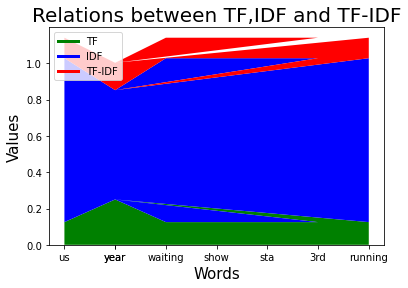

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

x=tf_idf_table["Word"]
y1=tf_idf_table["TF"]
y2=tf_idf_table["IDF"]
y3=tf_idf_table["TF-IDF"]
#------------------------------------------------------------------------------------------
plt.plot([],[],color='green', label="TF", linewidth=3)
plt.plot([],[],color='blue', label="IDF", linewidth=3)
plt.plot([],[],color='red', label="TF-IDF", linewidth=3)
#------------------------------------------------------------------------------------------
plt.stackplot(x, y1, y2, y3,colors=['green','blue','red','#d631f7'])
#------------------------------------------------------------------------------------------
plt.xticks(x)
plt.legend(loc="upper left")
plt.title("Relations between TF,IDF and TF-IDF",fontsize=20)
plt.ylabel('Values',fontsize=15)
plt.xlabel("Words",fontsize=15)
plt.show()

<p>From this visualization we can see distribution of TF,IDF and TF-IDF values together with words for which them were calculated.</p>

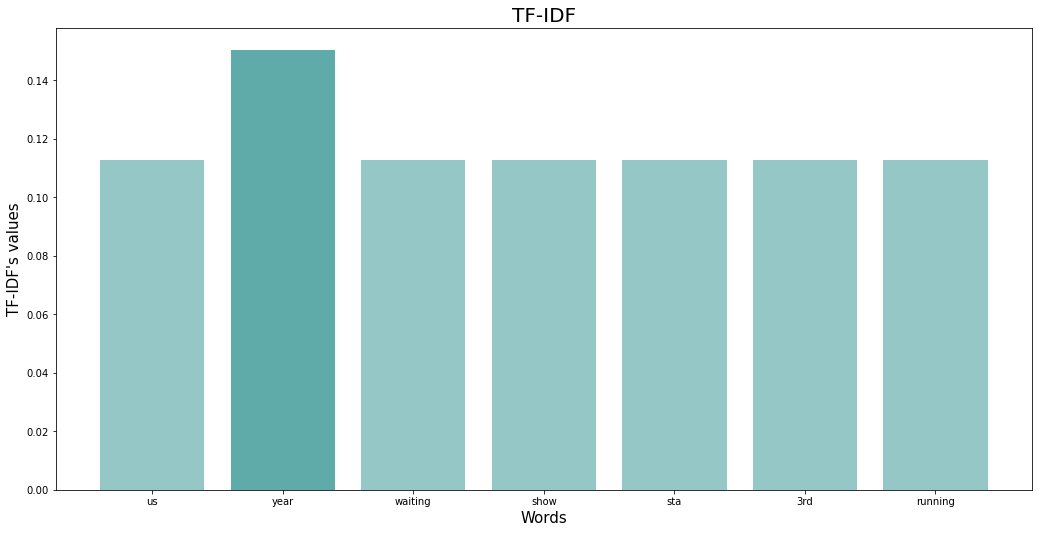

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

x=tf_idf_table['Word'][0:15]
y=tf_idf_table['TF-IDF'][0:15]
fig, ax = plt.subplots()
fig.set_size_inches(17.5, 8.5)

plt.bar(x, y, align='center',color="#2B908F", alpha=0.5)
plt.title("TF-IDF", fontsize=20)
ax.set_ylabel("TF-IDF's values", fontsize=15)
ax.set_xlabel('Words', fontsize=15)
plt.show()

<p>TF-IDF values that we calculated earlier for  one sentence.</p>

Text(0, 0.5, 'Run time(in sec)')

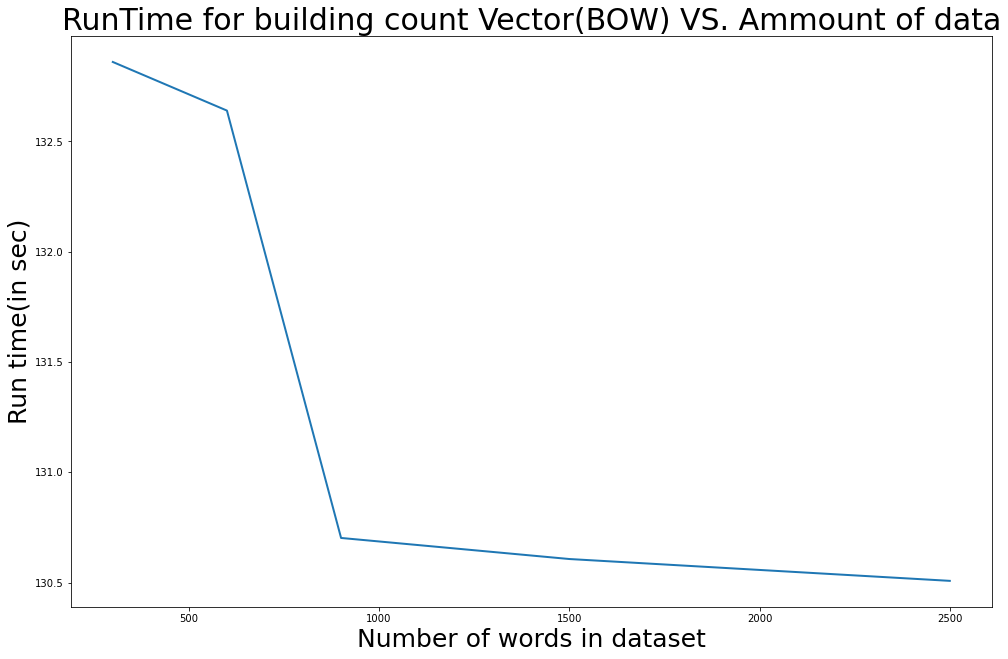

In [73]:
import matplotlib.pyplot as plt
counts=list(timeDict.keys())#x
timeValues=list(timeDict.values())#y

fig, ax = plt.subplots()
fig.set_size_inches(16.5, 10.5)
ax.plot(counts, timeValues, linewidth=2.0)
plt.title('RunTime for building count Vector(BOW) VS. Ammount of data', fontsize=30)
ax.set_xlabel('Number of words in dataset', fontsize=25)
ax.set_ylabel('Run time(in sec)', fontsize=25)

<p>From this visualization we can understand that this method not efficient when working with big amound of data and you must to find another way with better run time.</p>